In [150]:
import docx2txt

In [151]:
import nltk 

In [152]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [153]:
from nltk.corpus import stopwords

In [154]:
from textblob import TextBlob 

In [155]:
import pandas as pd 

In [156]:
import matplotlib

In [157]:
clothingdf=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [158]:
clothingdf.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [226]:
df = clothingdf[["Title", "Review Text" , "Rating" , "Division Name" , "Department Name"]]

In [227]:
df

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses


In [161]:
clothing.columns.str.lower()

Index(['title', 'review text', 'rating', 'division name', 'department name'], dtype='object')

In [230]:
df.columns = [col.lower().replace(" ","_") for col in df.columns]

In [231]:
df.head()

,title,review_text,rating,division_name,department_name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19662 non-null  object
 1   review_text      22628 non-null  object
 2   rating           22628 non-null  int64 
 3   division_name    22628 non-null  object
 4   department_name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


<AxesSubplot:>

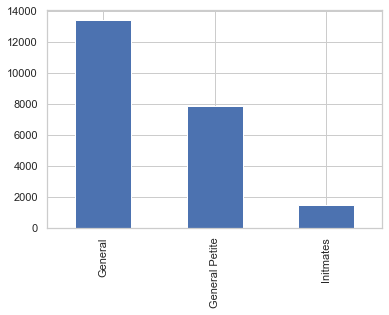

In [233]:
df['division_name'].value_counts().plot(kind='bar')

<AxesSubplot:>

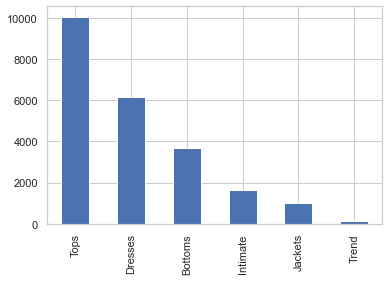

In [234]:
df['department_name'].value_counts().plot(kind='bar')

In [235]:
df['review_text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: review_text, Length: 22628, dtype: object

In [236]:
def get_len(x):
    # if x is not NaN, then:
    if x==x:
        return len(x)
    # else if x is NaN return 0
    else:
        return 0

In [237]:
df['len_rev'] = df['review_text'].apply(lambda x: get_len(x))

<ipython-input-237-aac1303eda20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['len_rev'] = df['review_text'].apply(lambda x: get_len(x))


<AxesSubplot:xlabel='len_rev', ylabel='Count'>

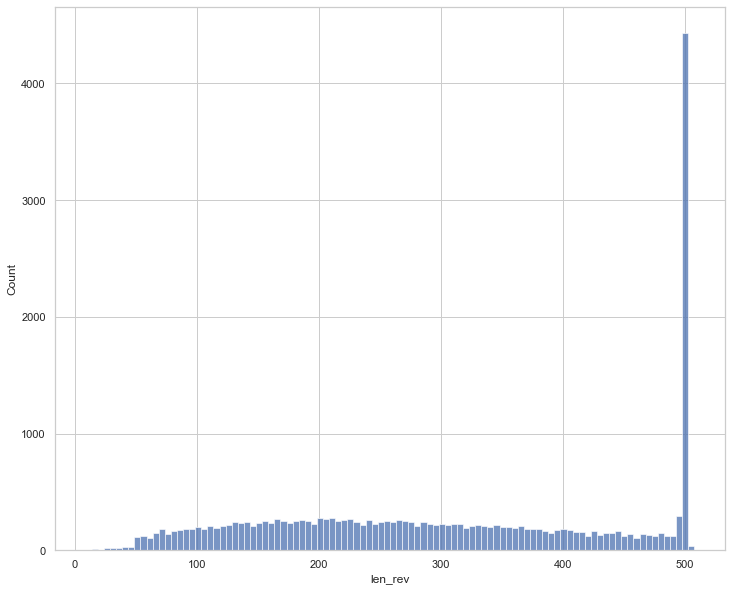

In [238]:
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(df['len_rev'], bins=100, ax=ax)

In [239]:
df[df['len_rev'] == 500]['review_text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

<AxesSubplot:xlabel='len_rev', ylabel='Count'>

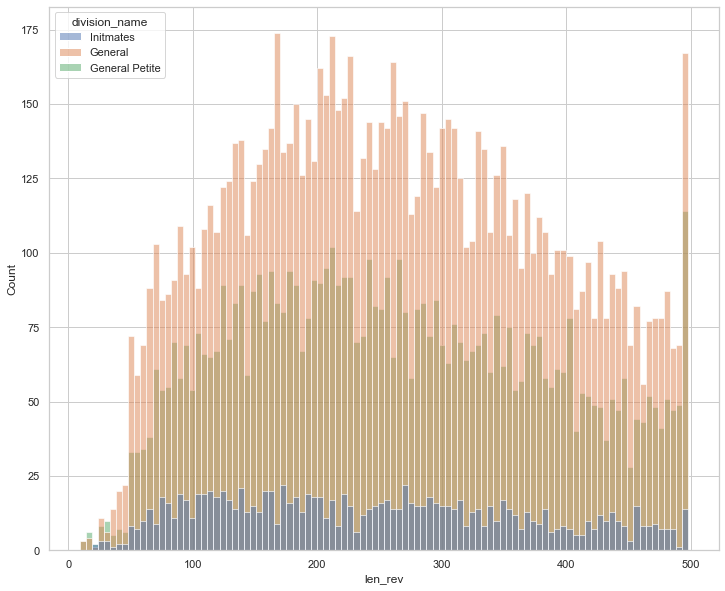

In [240]:
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(df[(df['len_rev'] < 499) & (df['len_rev'] != 0)],
             x='len_rev',
             bins=100,
             ax=ax,
             hue='division_name')

<AxesSubplot:xlabel='len_rev', ylabel='Count'>

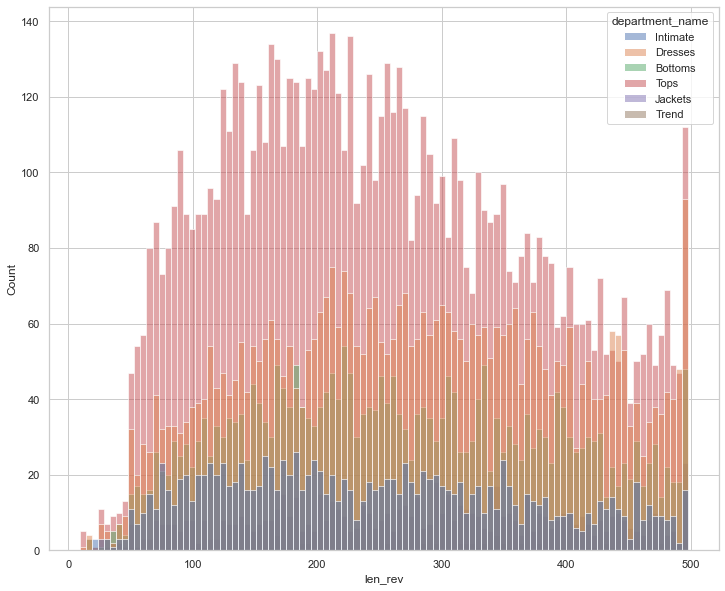

In [241]:
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(df[(df['len_rev'] < 499) & (df['len_rev'] != 0)],
             x='len_rev',
             bins=100,
             ax=ax,
             hue='department_name')

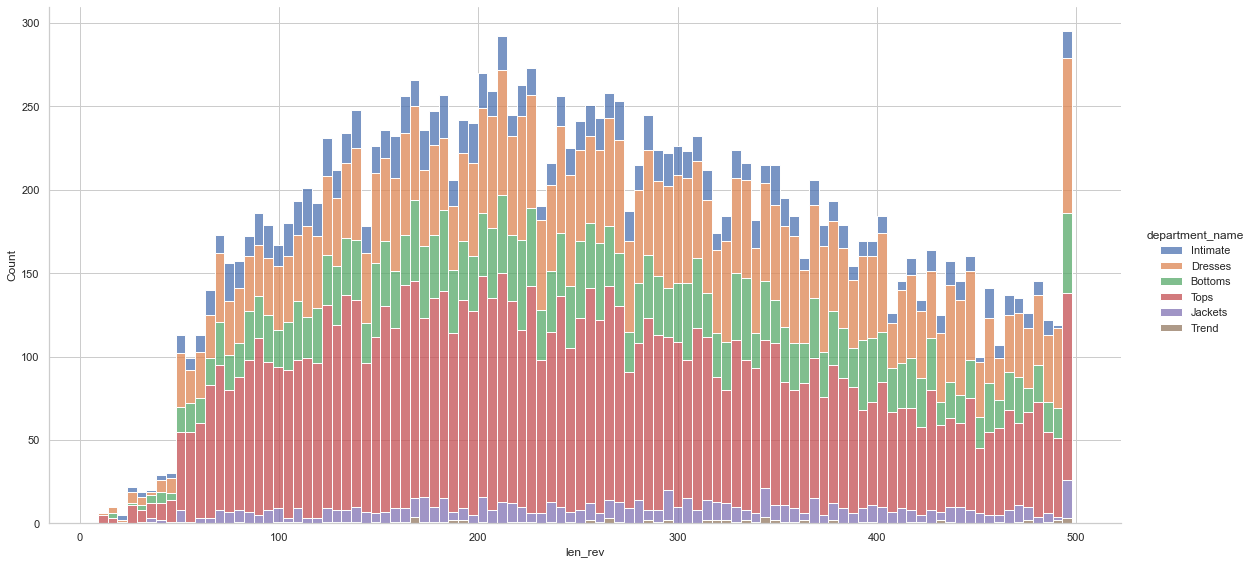

In [242]:
sns.displot(data=df[(df['len_rev']<499) & (df['len_rev']!=0)],
            x="len_rev",
            hue="department_name",
            multiple="stack",
            bins=100,
            height=8,
            aspect=2
           )

In [243]:
df_by_div_dep = df.groupby(['division_name', 'department_name']).agg({'rating':'mean'}).reset_index()

In [244]:
df_by_div_dep["div_dep"] = df_by_div_dep['division_name'] + " " + df_by_div_dep['department_name']

<AxesSubplot:ylabel='div_dep'>

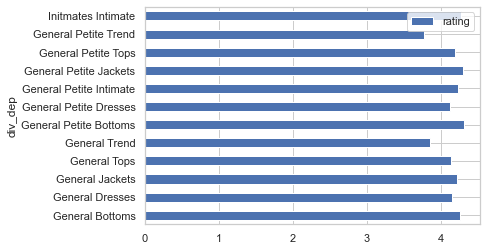

In [245]:
df_by_div_dep.plot(kind="barh", y='rating', x='div_dep')

In [246]:
text = df.iloc[5]['review_text']

In [247]:
testimonial = TextBlob(text)

In [248]:
testimonial.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [249]:
testimonial.sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [256]:
df['review_text'].isna().sum()

0

In [251]:
df = df.dropna(subset=['review_text'], how='any')

In [252]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [253]:
df['polarity'] = df['review_text'].apply(get_polarity)

In [254]:
df_min_pol = df.groupby(['division_name', 'department_name']).agg({'polarity':'min'}).reset_index()

In [255]:
df_min_pol['div_dep'] = df_min_pol['division_name'] + " " + df_min_pol['department_name']
df_min_pol

,division_name,department_name,polarity,div_dep
0,General,Bottoms,-0.533333,General Bottoms
1,General,Dresses,-0.916667,General Dresses
2,General,Jackets,-0.750000,General Jackets
3,General,Tops,-0.975000,General Tops
4,General,Trend,-0.270833,General Trend
5,General Petite,Bottoms,-0.257778,General Petite Bottoms
6,General Petite,Dresses,-0.400000,General Petite Dresses
7,General Petite,Intimate,-0.575000,General Petite Intimate
8,General Petite,Jackets,-0.562500,General Petite Jackets
9,General Petite,Tops,-0.700000,General Petite Tops


<AxesSubplot:ylabel='div_dep'>

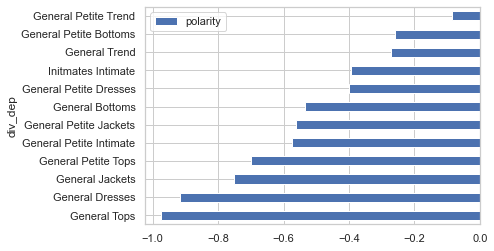

In [257]:
df_min_pol = df_min_pol.sort_values(by='polarity')
df_min_pol.plot(kind="barh", y='polarity', x='div_dep')

In [258]:
df_mean_pol = df.groupby(['division_name', 'department_name']).agg({'polarity':'mean'}).reset_index()

<AxesSubplot:ylabel='div_dep'>

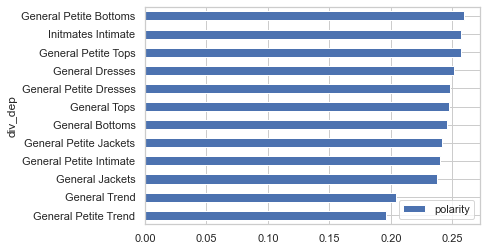

In [259]:
df_mean_pol = df_mean_pol.sort_values(by='polarity')
df_mean_pol['div_dep'] = df_mean_pol['division_name'] + " " + df_mean_pol['department_name']
df_mean_pol.plot(kind='barh', y='polarity', x='div_dep')